In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("australia_test_batting_cleaned.csv")

### Looking at the data

In [4]:
df.head()

,Career Span,Matches,Innings,NO’s,Runs,HS,Average,100s,50s,0s,start_career,end_career,career_length,career_midpoint,matches_per_year,50_convergences
0,1928-1932,4,7,0,143,41,20.42,0,0,0,1928,1932,5,1930,0.800000,NaN
1,2013-2017,4,7,1,195,98,32.50,0,1,0,2013,2017,5,2015,0.800000,0.0
2,1981-1991,41,53,22,203,26,6.54,0,0,13,1981,1991,11,1986,3.727273,NaN
3,1880-1884,2,4,0,52,33,13.00,0,0,0,1880,1884,5,1882,0.400000,NaN
4,1933-1933,1,2,1,17,17,17.00,0,0,1,1933,1933,1,1933,1.000000,NaN


In [5]:
df.describe()

,Matches,Innings,NO’s,Runs,HS,Average,100s,50s,0s,start_career,end_career,career_length,career_midpoint,matches_per_year,50_convergences
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,232.000000
mean,20.571106,32.753950,4.329571,926.566591,79.110609,22.545327,1.943567,4.144470,3.300226,1954.489842,1959.277652,5.787810,1956.681716,3.076323,0.228783
std,27.033100,43.626868,6.619572,1755.029175,72.731104,16.366699,5.213884,8.376431,4.415898,43.062900,42.982077,4.830159,42.934553,2.196432,0.250353
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1877.000000,1877.000000,1.000000,1877.000000,0.285714,0.000000
25%,3.000000,5.000000,0.000000,52.000000,23.000000,10.400000,0.000000,0.000000,0.000000,1920.500000,1927.000000,2.000000,1924.000000,1.309524,0.000000
50%,10.000000,15.000000,2.000000,234.000000,53.000000,20.000000,0.000000,1.000000,2.000000,1964.000000,1968.000000,4.000000,1966.000000,2.500000,0.216374
75%,26.500000,42.000000,6.000000,955.000000,120.500000,31.860000,1.000000,4.000000,5.000000,1987.000000,1993.500000,9.000000,1989.500000,4.128788,0.352778
max,168.000000,287.000000,51.000000,13378.000000,380.000000,144.000000,41.000000,63.000000,35.000000,2019.000000,2020.000000,23.000000,2019.000000,11.000000,1.000000


### Looking at the distributions

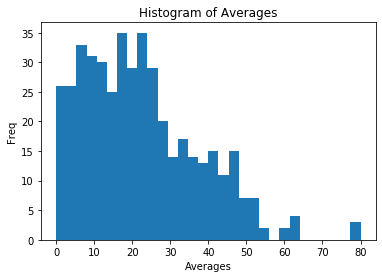

In [47]:
plt.hist(np.clip(df.Average, -1, 80), bins=30)
plt.title('Histogram of Averages')
plt.xlabel('Averages')
plt.ylabel('Freq')
plt.savefig('test averages hisogram.png', dpi=300)
plt.show()

#seems to be expon dist, maybe norm

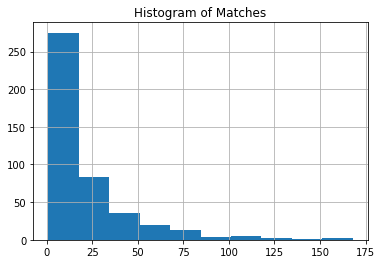

In [46]:
df.Matches.hist()
plt.title('Histogram of Matches')
plt.savefig('test matches hisogram.png', dpi=300)
plt.show()
#seeems expon dist

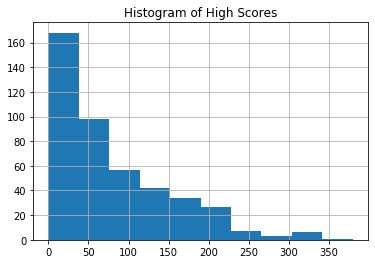

In [8]:
df.HS.hist()
plt.title('Histogram of High Scores')

plt.show()

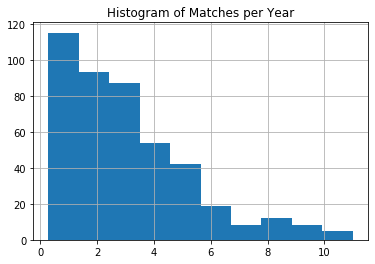

In [9]:
df.matches_per_year.hist()
plt.title('Histogram of Matches per Year')

plt.show()

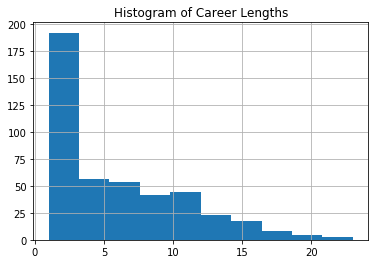

In [10]:
df.career_length.hist()
plt.title('Histogram of Career Lengths')

plt.show()

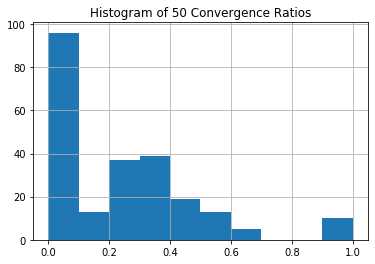

In [11]:
df["50_convergences"].hist()
plt.title('Histogram of 50 Convergence Ratios')

plt.show()

### Looking at correlations

In [12]:
df[["Innings","Runs","HS","Average","100s","50s","0s","career_length","matches_per_year","50_convergences","career_midpoint"]].corr()

,Innings,Runs,HS,Average,100s,50s,0s,career_length,matches_per_year,50_convergences,career_midpoint
Innings,1.000000,0.918272,0.680409,0.424764,0.801930,0.884372,0.786566,0.729972,0.695323,0.125147,0.247289
Runs,0.918272,1.000000,0.757387,0.555449,0.958218,0.965704,0.551218,0.614006,0.594305,0.261656,0.218604
HS,0.680409,0.757387,1.000000,0.780782,0.716888,0.720748,0.359227,0.591299,0.501387,0.543970,0.175701
Average,0.424764,0.555449,0.780782,1.000000,0.547111,0.543876,0.118322,0.345184,0.334765,0.483740,0.167733
100s,0.801930,0.958218,0.716888,0.547111,1.000000,0.888717,0.427796,0.510157,0.490942,0.368814,0.188349
50s,0.884372,0.965704,0.720748,0.543876,0.888717,1.000000,0.498722,0.568726,0.578725,0.169682,0.217013
0s,0.786566,0.551218,0.359227,0.118322,0.427796,0.498722,1.000000,0.630510,0.594290,-0.042158,0.224429
career_length,0.729972,0.614006,0.591299,0.345184,0.510157,0.568726,0.630510,1.000000,0.261303,0.070821,-0.017487
matches_per_year,0.695323,0.594305,0.501387,0.334765,0.490942,0.578725,0.594290,0.261303,1.000000,-0.013706,0.405053
50_convergences,0.125147,0.261656,0.543970,0.483740,0.368814,0.169682,-0.042158,0.070821,-0.013706,1.000000,-0.043282


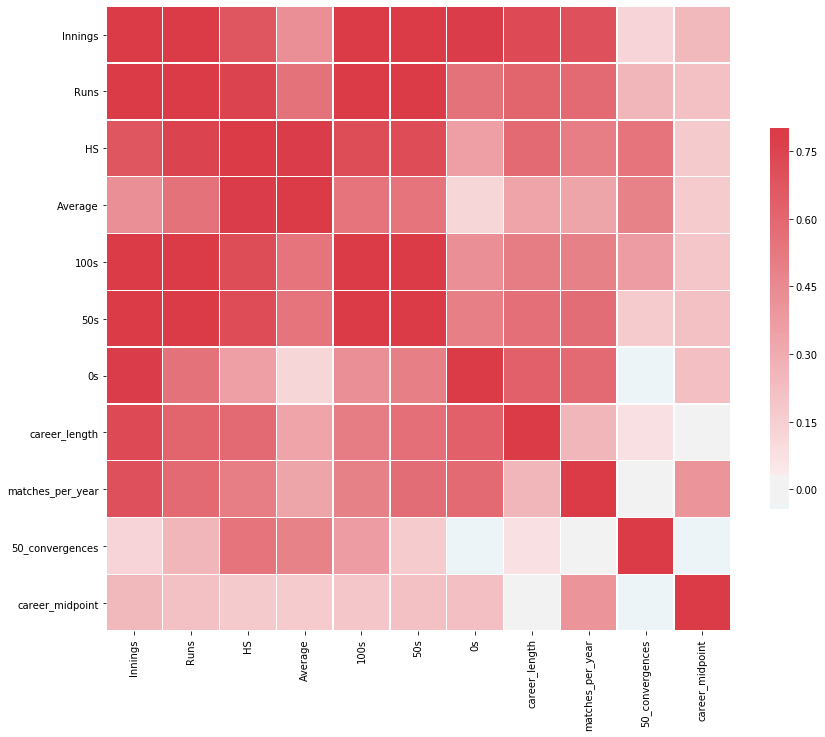

In [31]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(14,14))
sns.heatmap(df[["Innings","Runs","HS","Average","100s","50s","0s","career_length","matches_per_year","50_convergences","career_midpoint"]].corr(), cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('aus data heatmap.png', dpi=300)

### Learning how to put cont data into ranges

In [14]:
import numpy as np
criteria = [df['career_length'].between(1, 5), df['career_length'].between(6, 10), df['career_length'].between(11, 25)]
values = ["a:1-5 years","b:6-10 years", "c:11+ years"]
df['career_length_ranges'] = np.select(criteria, values, 0)

criteria = [df['HS'].between(0, 50), df['HS'].between(51, 100), df['HS'].between(101,150), df['HS'].between(151,200), df['HS'].between(201,250), df['HS'].between(251,400)]
values = ["a:HS:0-50","b:HS:51-100", "c:HS:101-150", "d:HS:151-200", "e:HS:201-250", "f:HS:251+"]
df['HS_ranges'] = np.select(criteria, values, 0)


pd.pivot_table(df, index = ["career_length_ranges","HS_ranges"], values = "Average")

Average
career_length_ranges HS_ranges              
a:1-5 years          a:HS:0-50     11.775394
                     b:HS:51-100   28.283864
                     c:HS:101-150  36.416400
                     d:HS:151-200  40.037000
                     e:HS:201-250  59.655000
                     f:HS:251+     54.355000
b:6-10 years         a:HS:0-50     11.452750
                     b:HS:51-100   20.259231
                     c:HS:101-150  31.050909
                     d:HS:151-200  39.798000
                     e:HS:201-250  43.720000
                     f:HS:251+     45.035000
c:11+ years          a:HS:0-50     10.716364
                     b:HS:51-100   19.354286
                     c:HS:101-150  28.565455
                     d:HS:151-200  38.820000
                     e:HS:201-250  44.655385
                     f:HS:251+     55.734286

In [15]:
criteria = [df['matches_per_year'].between(0, 3), df['matches_per_year'].between(4, 7), df['matches_per_year'].between(8, 25)]
values = ["0-3","4-7", "8+"]
df['matches_per_year_range'] = np.select(criteria, values, 0)


pd.pivot_table(df, index = "matches_per_year_range", values = "Average")

,Average
matches_per_year_range,
0,24.814706
0-3,19.339364
4-7,27.814653
8+,34.462400


### Scatter plots

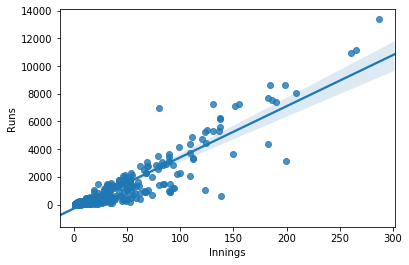

In [51]:
#plt.scatter(df.Innings,df.Runs,)
sns.regplot(df['Innings'],df['Runs'])
plt.show()

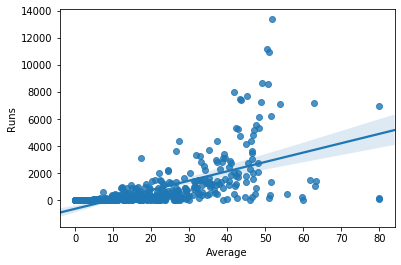

In [58]:
sns.regplot(np.clip(df['Average'], 0, 80),df['Runs'])
plt.show()

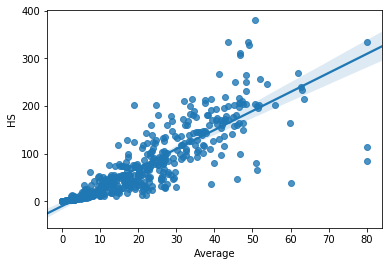

In [57]:
sns.regplot(np.clip(df['Average'], 0, 80),df['HS'])
plt.show()

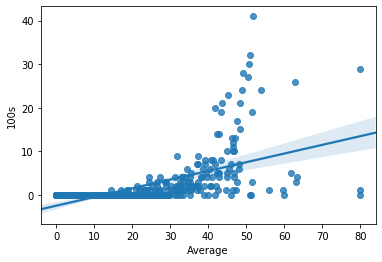

In [56]:
sns.regplot(np.clip(df['Average'], 0, 80),df['100s'])
plt.show()

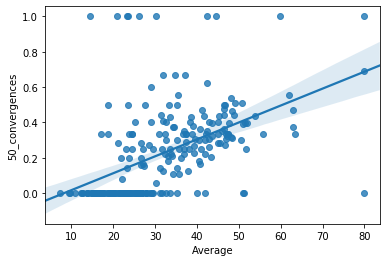

In [61]:
sns.regplot(np.clip(df['Average'], 0, 80),df['50_convergences'])
plt.show()

Does seem as though some of the correllations would be better fitted to a parabola line. May be important to bare this in mind when constructing a model. 
I've removed the outliers in the averages data here. May be best to remove them from the original data set. For this example I won't do this as this is a good example of applying np.clip for me.